In [33]:
from stl import mesh
from matplotlib import pyplot
import pandas as pd


### Minimal code for reshaping the .stl (s) such as  LRO is compatible with reality

In [30]:
lro_mesh = mesh.Mesh.from_file('../CADs/LRO_35.stl')

In [31]:
for i, _ in enumerate(lro_mesh.vectors):
    lro_mesh.vectors[i] =  lro_mesh.vectors[i]/10
    

In [32]:
lro_mesh.save('../CADs/LRO_35_reduced.stl', mode=stl.Mode.ASCII)  # save as ASCII

###  Results Kalman implementation => noisy position measurement!! ¶

In [252]:
df_ = pd.read_csv('../build/result_2d.csv')
df = pd.DataFrame([])
df['time'] = df_.iloc[:,0]
df['gt_x'] = df_.iloc[:,1]
df['gt_y'] = df_.iloc[:,2]
df['gt_vx'] = df_.iloc[:,3]
df['gt_vy'] = df_.iloc[:,4]
df['m_x'] = df_.iloc[:,5]
df['m_y'] = df_.iloc[:,6]
df['kf_x'] = df_.iloc[:,7]
df['kf_y'] = df_.iloc[:,8]
df['kf_vx'] = df_.iloc[:,9]
df['kf_vy'] = df_.iloc[:,10]



In [253]:
df.head()

,time,gt_x,gt_y,gt_vx,gt_vy,m_x,m_y,kf_x,kf_y,kf_vx,kf_vy
0,20,10.1228,49.9983,0.010459,-0.000277,18.00000,50.0000,15.34990,49.7590,0.549686,0.040763
1,32,10.2076,49.9954,0.010764,-0.000469,4.12275,57.9983,8.63331,56.0148,-0.042143,0.304394
2,52,10.3395,49.9880,0.011219,-0.000767,9.20764,39.9954,8.89548,45.4285,-0.020649,-0.143921
3,80,10.5715,49.9674,0.011974,-0.001292,12.33950,41.9880,11.15910,41.8252,0.021473,-0.138889
4,116,10.9214,49.9203,0.013020,-0.002082,3.57148,46.9674,6.35650,43.4901,-0.042005,-0.058949


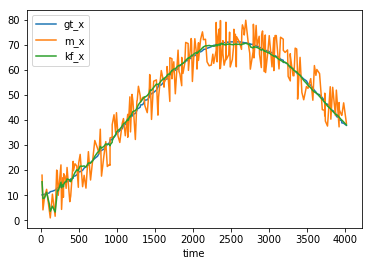

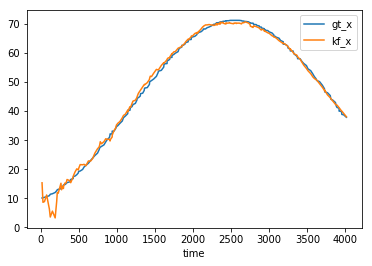

In [254]:

df[['time','gt_x','m_x','kf_x']].plot(x='time')
df[['time','gt_x','kf_x']].plot(x='time')

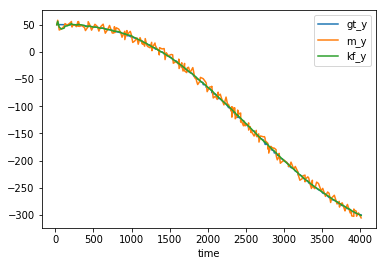

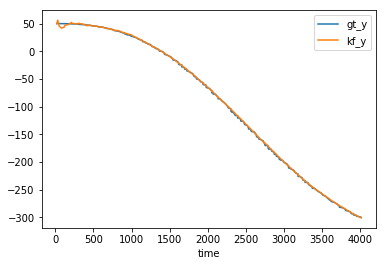

In [255]:
df[['time','gt_y','m_y','kf_y']].plot(x='time')
df[['time','gt_y','kf_y']].plot(x='time')

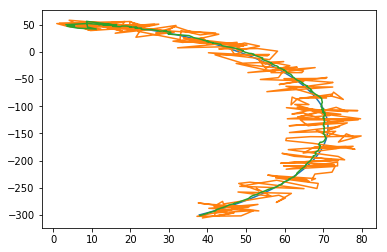

In [256]:

pyplot.plot(df['gt_x'],df['gt_y'],df['m_x'],df['m_y'],df['kf_x'],df['kf_y'])

In [272]:
vs = []

vx_m = [0]
vy_m = [0]

x_m_bf = df.iloc[0,3]
y_m_bf = df.iloc[0,4]

t_bf =0

bf_flag =True

for r in df.iterrows():
    if  bf_flag:
        bf_flag = False
    else:
        t = r[1]['time']
        x_m = r[1]['m_x']
        y_m = r[1]['m_y']

        vx_m.append( (x_m -x_m_bf) / (t-t_bf) )
        vy_m.append( (y_m -y_m_bf) / (t-t_bf) )
        
    print(t)

    x_m_bf = x_m
    y_m_bf = y_m
    t_bf = t
    
    
df['m_vx'] = vx_m
df['m_vy'] = vy_m
    

4012.0
32.0
52.0
80.0
116.0
128.0
156.0
192.0
212.0
220.0
232.0
268.0
276.0
296.0
300.0
304.0
320.0
336.0
348.0
384.0
396.0
428.0
432.0
452.0
476.0
496.0
500.0
520.0
552.0
572.0
596.0
628.0
656.0
684.0
712.0
748.0
768.0
776.0
784.0
800.0
832.0
856.0
876.0
904.0
912.0
912.0
940.0
940.0
964.0
984.0
996.0
1016.0
1040.0
1072.0
1088.0
1112.0
1144.0
1144.0
1172.0
1180.0
1200.0
1212.0
1244.0
1264.0
1268.0
1284.0
1308.0
1312.0
1340.0
1360.0
1364.0
1368.0
1400.0
1428.0
1432.0
1440.0
1456.0
1484.0
1520.0
1540.0
1548.0
1584.0
1616.0
1620.0
1624.0
1660.0
1660.0
1676.0
1696.0
1696.0
1724.0
1724.0
1732.0
1748.0
1768.0
1804.0
1816.0
1828.0
1852.0
1852.0
1868.0
1892.0
1904.0
1936.0
1940.0
1976.0
1980.0
1992.0
2024.0
2052.0
2052.0
2072.0
2072.0
2100.0
2124.0
2136.0
2136.0
2164.0
2184.0
2212.0
2240.0
2260.0
2272.0


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


2304.0
2304.0
2316.0
2316.0
2316.0
2316.0
2328.0
2344.0
2352.0
2360.0
2360.0
2360.0
2360.0
2392.0
2392.0
2408.0
2432.0
2432.0
2432.0
2436.0
2468.0
2480.0
2488.0
2516.0
2532.0
2536.0
2536.0
2556.0
2568.0
2572.0
2608.0
2636.0
2640.0
2648.0
2668.0
2672.0
2692.0
2728.0
2744.0
2752.0
2752.0
2788.0
2792.0
2796.0
2800.0
2800.0
2828.0
2840.0
2868.0
2872.0
2896.0
2900.0
2912.0
2936.0
2936.0
2948.0
2952.0
2980.0
3000.0
3036.0
3060.0
3060.0
3060.0
3076.0
3092.0
3128.0
3148.0
3184.0
3184.0
3208.0
3240.0
3248.0
3276.0
3276.0
3276.0
3312.0
3324.0
3340.0
3360.0
3372.0
3372.0
3404.0
3428.0
3452.0
3488.0
3508.0
3544.0
3572.0
3592.0
3612.0
3624.0
3660.0
3696.0
3724.0
3728.0
3728.0
3736.0
3764.0
3800.0
3808.0
3832.0
3868.0
3880.0
3888.0
3916.0
3916.0
3920.0
3948.0
3952.0
3976.0
4012.0


In [267]:
len(df)

234

In [268]:
len(vx_m)

1

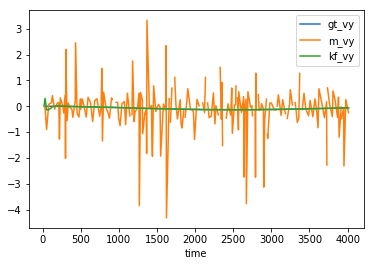

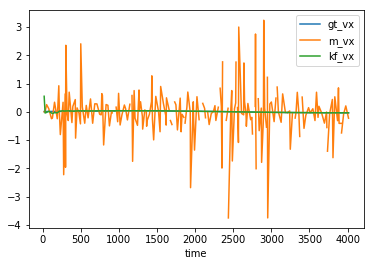

In [274]:
df[['time','gt_vy','m_vy','kf_vy']].plot(x='time')
df[['time','gt_vx','m_vx','kf_vx']].plot(x='time')

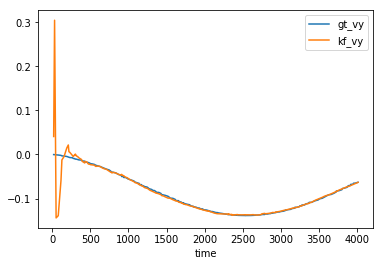

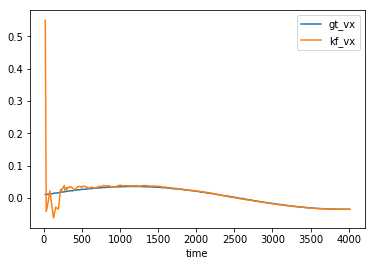

In [276]:
df[['time','gt_vy','kf_vy']].plot(x='time')
df[['time','gt_vx','kf_vx']].plot(x='time')